# **Assignment 1: Kaggle Competition**



Imports and load saved datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split

warnings.filterwarnings("ignore")

import os, sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, "../"))

from src.data.sets import load_dataframes

In [2]:
df_train_name = "NBA_train"
df_test_name = "NBA_test"

df_train = pd.read_csv(f"../data/raw/{df_train_name}.csv")
df_test = pd.read_csv(f"../data/raw/{df_test_name}.csv")

X_train, y_train, X_val, y_val, X_test, y_test = load_dataframes()

### 6. Modelling

#### 6.4 Train Random Forest

Instantiate a RandomForestClassifier() model.

Reduce overfitting with hyperparameters.

In [3]:
rf = RandomForestClassifier(random_state=8)

**[6.4.1]** Let's create a dictionary containing the grid search parameters

In [4]:
hyperparams_grid = {
    'n_estimators': np.arange(10, 100, 20),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(2, 20, 4)
    }
hyperparams_grid

{'n_estimators': array([10, 30, 50, 70, 90]),
 'max_depth': array([ 5, 10, 15, 20, 25]),
 'min_samples_leaf': array([ 2,  6, 10, 14, 18])}

**[6.4.2]** Instantiate a GridSearchCV with the hyperparameter grid and the random forest model

In [5]:
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=2, verbose=1)

**[6.4.3]** Fit the GridSearchCV on the training set

In [6]:
grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 125 candidates, totalling 250 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=1)

**[6.4.3]** Display the best set of hyperparameters

In [7]:
grid_search_rf.best_params_

{'max_depth': np.int64(15),
 'min_samples_leaf': np.int64(14),
 'n_estimators': np.int64(30)}

**[6.4.4]** Print the accuracy score of the training, test, and validation sets

In [8]:
print("Train:", grid_search_rf.score(X_train, y_train))
print("Test:", grid_search_rf.score(X_test, y_test))
print("Validation:", grid_search_rf.score(X_val, y_val))

Train: 0.8453125
Test: 0.8375
Validation: 0.8125


**[6.4.5]** Let's define the hyperparameters value randomly

In [217]:
hyperparams_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 30),
    'min_samples_leaf': randint(2, 20)
}

**[6.4.6]** Instantiate a KFold with 5 splits

In [220]:
kf_cv = KFold(n_splits=5)

**[6.4.7]** Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model

In [221]:
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)

**[6.4.8]** Fit the RandomizedSearchCV on the training set

In [222]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x130a94f10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12f165a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1315b5790>},
                   random_state=8, verbose=1)

**[6.4.8]** Display the best set of hyperparameters

In [223]:
random_search_rf.best_params_

{'max_depth': 26, 'min_samples_leaf': 9, 'n_estimators': 69}

**[6.4.9]** Print the accuracy score of the training, test, and validation sets

In [226]:
print("Train:", random_search_rf.score(X_train, y_train))
print("Test:", random_search_rf.score(X_test, y_test))
print("Validation:", random_search_rf.score(X_val, y_val))

Train: 0.853125
Test: 0.84125
Validation: 0.809375


The accuracy scores for the training and validation sets are relatively close to each other.

This GridSearchCV model seems to be achieving good results and better validation score than the RandomizedSearchCV model.

We select GridSearchCV as the prediction model.

**[6.4.10]** Plot the confusion matrics for the training and validation sets

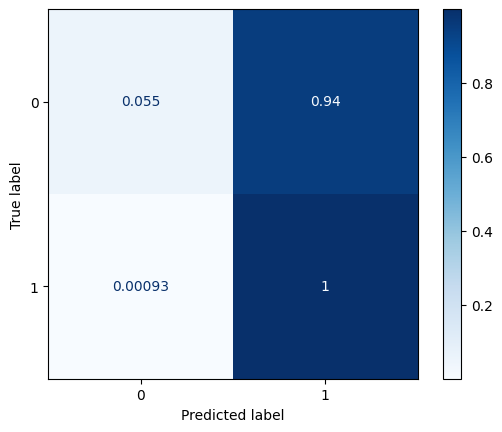

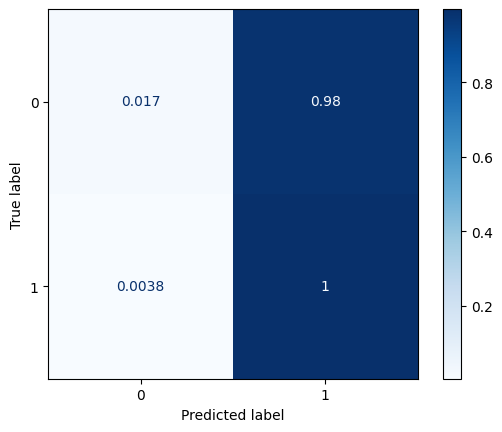

In [229]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**[6.4.11]** Print the confusion matrix on the validation set

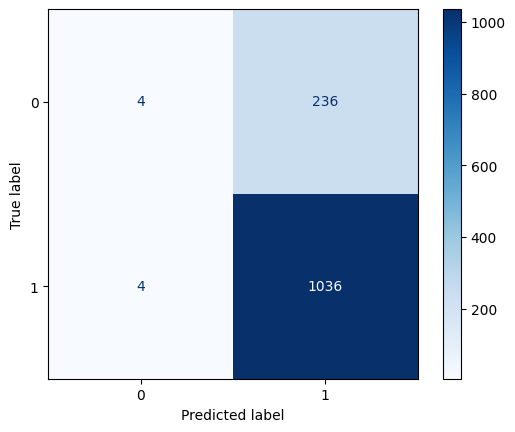

In [230]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_val, y_val,cmap=plt.cm.Blues)

The confusion matrices don't show relatively similar patterns.

The model is well overfitting and may not yield good results.

**[6.4.12]** Print the confusion matrix on the testing set

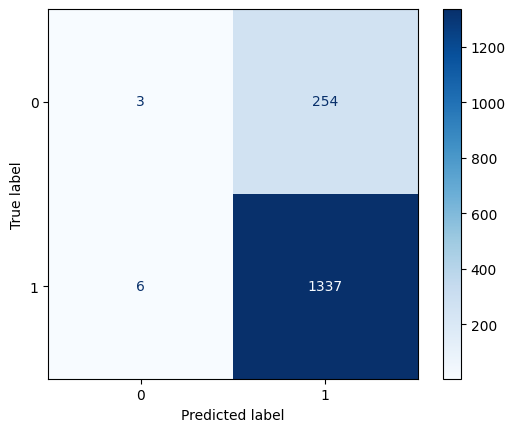

In [232]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_test, y_test, cmap=plt.cm.Blues)

The accuracy score for the testing set is close to the ones achieved on the training and testing sets.

**[6.4.13]** Print the classification reports on the training, testing and validation sets

In [233]:
rf_y_preds_train = grid_search_rf.predict(X_train)
print(classification_report(y_train, rf_y_preds_train, target_names=['major', 'minor']))

rf_y_preds_test = grid_search_rf.predict(X_test)
print(classification_report(y_test, rf_y_preds_test, target_names=['major', 'minor']))

rf_y_preds_val = grid_search_rf.predict(X_val)
print(classification_report(y_val, rf_y_preds_val, target_names=['major', 'minor']))

              precision    recall  f1-score   support

       major       0.92      0.06      0.10       834
       minor       0.84      1.00      0.92      4286

    accuracy                           0.85      5120
   macro avg       0.88      0.53      0.51      5120
weighted avg       0.86      0.85      0.78      5120

              precision    recall  f1-score   support

       major       0.33      0.01      0.02       257
       minor       0.84      1.00      0.91      1343

    accuracy                           0.84      1600
   macro avg       0.59      0.50      0.47      1600
weighted avg       0.76      0.84      0.77      1600

              precision    recall  f1-score   support

       major       0.50      0.02      0.03       240
       minor       0.81      1.00      0.90      1040

    accuracy                           0.81      1280
   macro avg       0.66      0.51      0.46      1280
weighted avg       0.76      0.81      0.73      1280



**[6.4.14]** Predict with test set `NBA_test`

In [234]:
df = df_test.copy()
X_preds_val = df
rf_y_preds_val = grid_search_rf.predict(X_preds_val)

In [237]:
df["TARGET_5Yrs"] = rf_y_preds_val
df = df[["Id", "TARGET_5Yrs"]]

**[6.4.14]** Save predictions to CSV

In [238]:
df.to_csv(f'../models/rf_{df_test_name}.csv', index=False)